In [1]:
import actualNN as nn
import numpy as np
from graph import Graph
from scipy.sparse import csr_matrix

In [2]:
def make_sparse_adj_matrix(w):
    # Outputs the scipy.sparse adjacency matrix of the graph
    n = np.size(w)
    s = np.sum(w)
    m = ( np.dot(w,w)/s )**2 + s
    m = int(m/2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum,0,0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m,1),wsum)
    J = np.digitize(np.random.rand(m,1),wsum)
    row_ind = np.append(I.reshape(m,)-1,J.reshape(m,)-1)
    col_ind = np.append(J.reshape(m,1)-1,I.reshape(m,)-1)
    ones = [1 for i in range(2*m)]    
    A = csr_matrix((ones, (row_ind,col_ind)), shape=(n,n))
    A.data.fill(1)
    return A

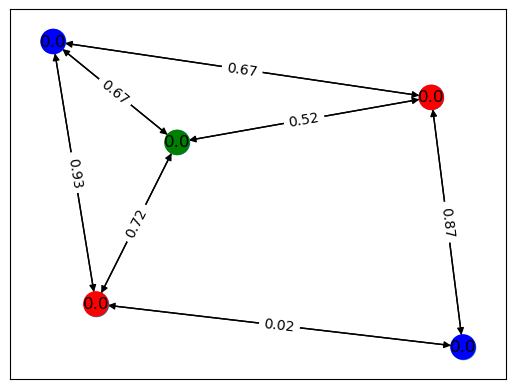

In [3]:

adjacency_matrix =make_sparse_adj_matrix(np.random.pareto(1.5, 5) + 1)
#convert to dense matrix
adjacency_matrix = np.array(adjacency_matrix.todense())
# Define the input and output nodes
input_nodes = [0, 1]
output_nodes = [2, 3]

# Define the neural network
neural_graph = Graph(adjacency_matrix)
neural_network = nn.ActualNeuralNetwork(neural_graph, input_nodes, output_nodes)
neural_network.display()

In [10]:
neural_network.forward_propagation(np.array([[1, 2]]))


[array([[1., 2., 0., 0., 0.]]), array([[1.        , 2.        , 1.48825681, 2.02183438, 0.55642021]])]


array([[0.35142088, 0.64857912]])

In [5]:
#mse gradient
g = neural_network.compute_mse_gradient(np.array([[1, 2]]))

In [6]:
print(g.shape)

(5, 5)


In [18]:
#generate examples, compute activation gradient for each example, and assert that the activation went up
examples = np.random.rand(100,2)

for i in range(100):
    print(i)
    neural_network.forward_propagation(np.array([examples[i]]))
    activation = np.copy(neural_network.current_activations)
    g = neural_network.compute_activation_gradients()
    for j in range(5):
        for k in range(5):
            for n in range(5):
               
                partial_der = g[0][j][k][n]
                neural_network.weights[j][k] += 0.00001*partial_der
                neural_network.forward_propagation(np.array([examples[i]]))
                activation1 = neural_network.current_activations[0][n]
                neural_network.weights[j][k] -= 0.00001*partial_der
                #assert that the activation went up 
                assert(activation1 - activation[0][n] >= 0)
    


0
[array([[0.43401972, 0.26827949, 0.        , 0.        , 0.        ]]), array([[0.43401972, 0.26827949, 0.34829606, 0.38274742, 0.23112427]]), array([[0.9361219 , 0.96026793, 0.85202053, 0.76549484, 0.46310079]]), array([[2.08563015, 2.45019995, 2.10406333, 1.90584896, 0.97028979]])]
[array([[0.43401972, 0.26827949, 0.        , 0.        , 0.        ]]), array([[0.43404024, 0.26827949, 0.34829606, 0.38274742, 0.23112427]]), array([[0.93616295, 0.96026793, 0.85203071, 0.76550247, 0.4631115 ]]), array([[2.08573294, 2.45021912, 2.10410106, 1.90587186, 0.97032195]])]
[array([[0.43401972, 0.26827949, 0.        , 0.        , 0.        ]]), array([[0.4340242 , 0.26827949, 0.34829606, 0.38274742, 0.23112427]]), array([[0.93613086, 0.96026793, 0.85202275, 0.7654965 , 0.46310312]]), array([[2.08565257, 2.45020413, 2.10407156, 1.90585395, 0.9702968 ]])]
[array([[0.43401972, 0.26827949, 0.        , 0.        , 0.        ]]), array([[0.43403834, 0.26827949, 0.34829606, 0.38274742, 0.23112427]]), 

In [11]:
neural_network.forward_propagation(np.array([[13, 2], [0, 4], [2, 1]]))

array([[1.00000000e+00, 0.00000000e+00],
       [3.74041738e-05, 9.99962596e-01],
       [4.47972878e-01, 5.52027122e-01]])

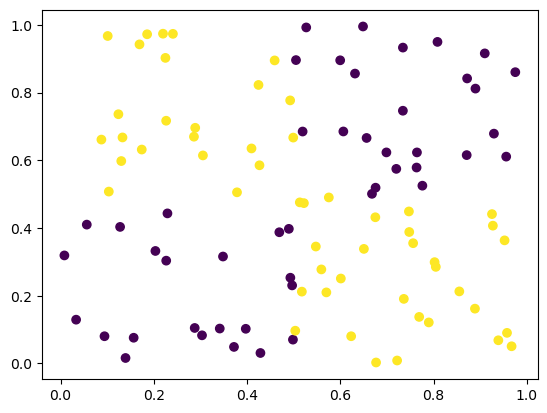

In [12]:
import benchmarks_generator
import matplotlib.pyplot as plt
inputs, outputs = benchmarks_generator.xor_dataset(100)

#plot
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)

In [13]:
#convert output to onehot
outputs_onehot = np.zeros((outputs.shape[0], 2))
outputs_onehot[np.arange(outputs.shape[0]), outputs.astype(int)] = 1

In [14]:
import loss_functions
print(inputs.shape)
#train
ea_result = neural_network.train(inputs.T, outputs_onehot, loss_functions.cross_entropy_loss)

(2, 100)
 num_gens: 23736 fitness: 0.0007225581156857138 loss: 1383.9717225388736

KeyboardInterrupt: 

In [16]:
import loss_functions
neural_network.train_gradient_descent(inputs.T, outputs_onehot, 0.000009, 1000, loss_functions.mse)

 num_iterations: 75 fitness: 1.0093879542009758 loss: 0.9906993597834173 gradient: 188.58480703592972

KeyboardInterrupt: 

In [16]:
#plot fitness history
plt.plot(ea_result.fitness_history)
plt.show()

NameError: name 'ea_result' is not defined

In [17]:
for i in range(42):
    plt.plot([mr[i] for mr in ea_result.mr_history])

plt.show()

NameError: name 'ea_result' is not defined

In [14]:
print(neural_network.weights)

[[ 0.          0.          0.          0.          0.         -0.01043181
   0.          0.          0.          0.          0.          0.
  -0.1922043   0.          0.        ]
 [ 0.         -0.16431157  0.          0.23707369 -0.05473331  0.25788809
  -0.01284284  0.1242192  -0.07423214  0.          0.          0.
  -0.15230646  0.05509411  0.        ]
 [ 0.          0.         -0.01105534  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.2362059   0.          0.          0.          0.
   0.         -0.01340563  0.          0.          0.19875801  0.
   0.          0.          0.        ]
 [ 0.         -0.24886464  0.          0.          0.         -0.10137342
   0.          0.          0.12770882  0.          0.          0.
   0.          0.07154419  0.09590825]
 [ 0.05960795 -0.16114295  0.          0.         -0.00220221 -0.06273316
   0.          0.          0.          0.      

In [15]:

print(loss_functions.mse(outputs_onehot, neural_network.forward_propagation(inputs.T)))

28.964454452934454


In [18]:
def accuracy(out_true, out_pred):
    return np.sum(np.argmax(out_true, axis=1) == np.argmax(out_pred, axis=1))/out_true.shape[0]

print(accuracy(outputs_onehot, neural_network.forward_propagation(inputs.T)))

0.64


c:\Users\sacha\Documents\CODE\Python\ActualNNs\actualNN.py:49: RuntimeWarning: invalid value encountered in divide
  output = output/np.sum(output, axis=1)[:, np.newaxis]


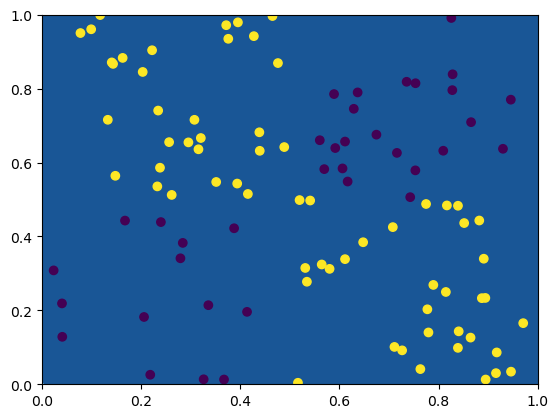

In [19]:
#plot decision boundary
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        z[i, j] = np.argmax(neural_network.forward_propagation(np.array([[xx[i, j], yy[i, j]]])))
plt.contourf(xx, yy, z, cmap='RdBu')
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)
plt.show()
